In [1]:
from prody import *
from matplotlib.pylab import *
import seaborn as sns
import pandas as pd
import numpy as np
ion()
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
# Load structure
fh = parsePDB("../Data/Structure_data/5upp_allsubunits_Repair.pdb")

@> 13936 atoms and 1 coordinate set(s) were parsed in 0.57s.


In [3]:
# select a single subunit and alpha carbons only
fh_chainA_ca = fh.select('calpha and chain A')

In [4]:
# build the GNM
gnm = GNM('Fumarate Hydratase')
gnm.buildKirchhoff(fh_chainA_ca)

@> Kirchhoff was built in 0.12s.


In [5]:
# calculate modes
gnm.calcModes()
hinges = gnm.getHinges()

@> 20 modes were calculated in 0.10s.


## First eigenvector

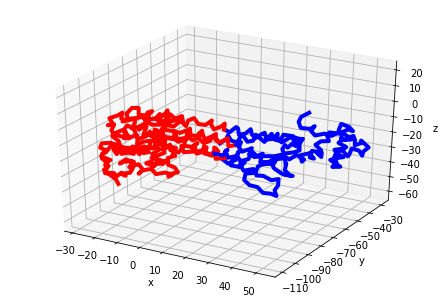

In [6]:
# visualise first mode - not what we expect given the three domain structure of the protein
showProtein(fh_chainA_ca, mode=gnm[0]);

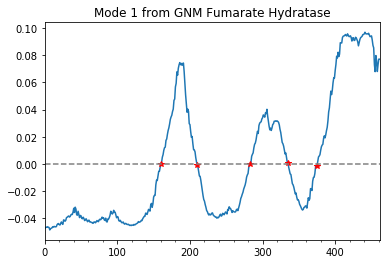

In [7]:
showMode(gnm[0], hinges=True, zero=True);

In [8]:
gnm[0].getHinges()

[160, 210, 283, 335, 375]

## Second Eigenvector

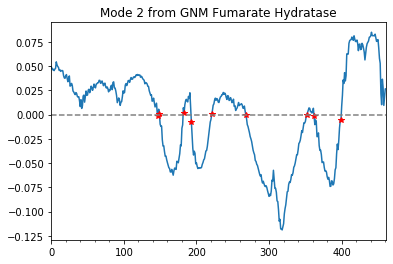

In [9]:
sns.despine()
showMode(gnm[1], hinges=True, zero=True);

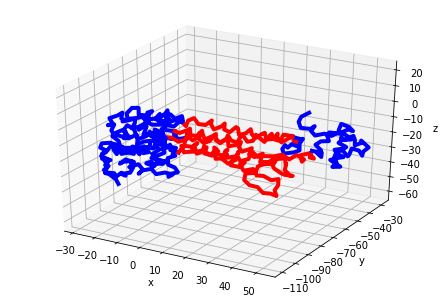

In [10]:
# visualise second mode - much more like what we would expect from a three domain protein
showProtein(fh_chainA_ca, mode=gnm[1]);

In [11]:
hingelist = gnm[1].getHinges()

In [12]:
gnm[1]

<Mode: 2 from GNM Fumarate Hydratase>

In [13]:
hingelist_adjusted = []
for item in hingelist:
    item = item+49
    hingelist_adjusted.append(item)

In [14]:
# get hinge residues
hingelist_adjusted

[196, 198, 232, 242, 270, 317, 401, 411, 448]

#### Custom Plotting

In [15]:
second_mode = gnm[1]

In [16]:
second_mode_eigvec = second_mode.getEigvec().round(3)

In [17]:
scatter_values = []
for item in hingelist:
    scatter_values.append([item, second_mode_eigvec[item]])

In [18]:
# split the data into regions above and below 0 so that we can plot them in different colours
second_mode_eigvec_above =np.copy(second_mode_eigvec)
second_mode_eigvec_below = np.copy(second_mode_eigvec)

In [19]:
second_mode_eigvec_above[second_mode_eigvec_above < 0] = 0

In [20]:
second_mode_eigvec_above

array([ 0.049,  0.048,  0.046,  0.047,  0.045,  0.047,  0.048,  0.054,
        0.051,  0.05 ,  0.049,  0.046,  0.046,  0.045,  0.045,  0.046,
        0.045,  0.04 ,  0.038,  0.037,  0.04 ,  0.041,  0.037,  0.034,
        0.038,  0.04 ,  0.029,  0.03 ,  0.032,  0.03 ,  0.024,  0.023,
        0.022,  0.021,  0.023,  0.022,  0.019,  0.018,  0.018,  0.014,
        0.008,  0.015,  0.006,  0.009,  0.019,  0.02 ,  0.013,  0.019,
        0.024,  0.02 ,  0.02 ,  0.025,  0.026,  0.023,  0.025,  0.029,
        0.028,  0.025,  0.028,  0.031,  0.028,  0.028,  0.032,  0.032,
        0.033,  0.033,  0.035,  0.035,  0.032,  0.033,  0.035,  0.032,
        0.03 ,  0.032,  0.032,  0.029,  0.027,  0.029,  0.027,  0.023,
        0.025,  0.025,  0.029,  0.03 ,  0.026,  0.033,  0.034,  0.028,
        0.027,  0.024,  0.02 ,  0.012,  0.015,  0.017,  0.015,  0.01 ,
        0.013,  0.013,  0.019,  0.025,  0.022,  0.023,  0.03 ,  0.032,
        0.03 ,  0.032,  0.035,  0.035,  0.033,  0.036,  0.038,  0.037,
      

In [21]:
second_mode_eigvec_below[second_mode_eigvec_below > 0] = 0

In [22]:
second_mode_eigvec_below

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
      

In [23]:
hingepoints = pd.DataFrame.from_records(scatter_values, columns= ["x", "y"])

In [24]:
plt.rcParams['figure.figsize'] = [10, 6]

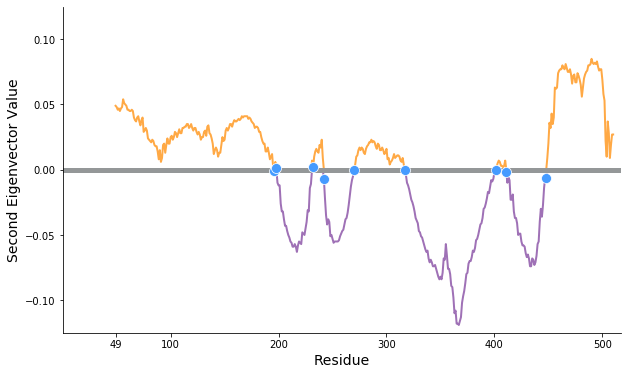

In [30]:
# do the plotting
ax2= sns.scatterplot(x = hingepoints["x"], y = hingepoints["y"], s= 100, zorder = 10, color = "#459BFF")

ax = sns.lineplot(data = second_mode_eigvec_above, lw = 2, color = "#FFA945")
ax = sns.lineplot(data = second_mode_eigvec_below, lw = 2, color = "#9F71B6")
ax.set_xlim([-49,468])
ax.set_xlabel("Residue", size =14)
ax.set_ylabel("Second Eigenvector Value", size = 14)
ax.set_ylim([-0.125, 0.125])
ax.set_xticks([0,51, 151,251,351,451])
ax.set_xticklabels([49,100,200,300,400,500])
ax.axhline(0, c = "#949798", lw = 5)
sns.despine()
plt.savefig("Figure2_B_gnmsecondmotion.png", dpi = 300)